In [1]:
%pylab inline
import os, sys, glob
import time
import numpy as np
import pickle
import json

import matplotlib as mpl
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load credential data 
from untappd_credentials import *

USER_NAME = 'ovarol'
#CLIENT_ID = "XXXXXXXXXXXXXX"
#CLIENT_SECRET = "XXXXXXXXXXXXXX"
#print 'Id:\t{}\nSecret:\t{}\n'.format(CLIENT_ID, CLIENT_SECRET)

In [3]:
# Using API from https://github.com/marshall91/pythonUntappd
import untappd_api as pythonUntappd

api = pythonUntappd.api(CLIENT_ID,CLIENT_SECRET)
userData = api.user_info(USER_NAME)['response']
#print json.dumps(userData, indent=4)

In [4]:
userData

{'user': {'uid': 2927509,
  'id': 2927509,
  'user_name': 'ovarol',
  'is_anonymous': 0,
  'first_name': 'Onur',
  'last_name': '',
  'user_avatar': 'https://assets.untappd.com/profile/8134e1a45254ea9f2bdd60cdf1677c7f_100x100.jpeg',
  'user_avatar_hd': 'https://assets.untappd.com/profile/8134e1a45254ea9f2bdd60cdf1677c7f_300x300.jpeg',
  'user_cover_photo': 'https://assets.untappd.com/site/assets/v3/images/cover_default.jpg',
  'user_cover_photo_offset': 0,
  'is_private': 0,
  'rating_bump': 0,
  'location': '',
  'url': '',
  'bio': 'Check out www.onurvarol.com/my_beer_exploration',
  'is_supporter': 0,
  'is_moderator': 0,
  'relationship': None,
  'block_status': 'none',
  'mute_status': 'unmute',
  'untappd_url': 'http://untappd.com/user/ovarol',
  'account_type': 'user',
  'stats': {'total_badges': 479,
   'total_friends': 11,
   'total_checkins': 568,
   'total_beers': 555,
   'total_created_beers': 0,
   'total_followings': 5,
   'total_photos': 13},
  'recent_brews': {'count': 

In [5]:
uniqueBeers = list()
userData = api.user_info(USER_NAME)['response']

count, keepCollect = 0, True
scanCount = 0
while keepCollect:
    resp = api.user_distinct_beers(USER_NAME, offset=count)['response']
    count += resp['beers']['count']
    uniqueBeers.extend(resp['beers']['items'])
    print('Unique beers collected: {}'.format(len(uniqueBeers)))
    scanCount += 1
    if resp['beers']['count'] != 0:
        time.sleep(1)
    else:
        break
        
uniqueBeers

Unique beers collected: 25
Unique beers collected: 50
Unique beers collected: 75
Unique beers collected: 100
Unique beers collected: 125
Unique beers collected: 150
Unique beers collected: 175
Unique beers collected: 200
Unique beers collected: 225
Unique beers collected: 250
Unique beers collected: 275
Unique beers collected: 300
Unique beers collected: 325
Unique beers collected: 350
Unique beers collected: 375
Unique beers collected: 400
Unique beers collected: 425
Unique beers collected: 450
Unique beers collected: 475
Unique beers collected: 500
Unique beers collected: 525
Unique beers collected: 550
Unique beers collected: 555
Unique beers collected: 555


[{'first_checkin_id': 1413960608,
  'first_created_at': 'Sun, 01 Sep 2024 17:09:33 +0100',
  'recent_checkin_id': 1413960608,
  'recent_created_at': 'Sun, 01 Sep 2024 17:09:33 +0100',
  'recent_created_at_timezone': 1,
  'rating_score': 4.25,
  'user_auth_rating_score': 0,
  'first_had': 'Sun, 01 Sep 2024 17:09:33 +0100',
  'count': 1,
  'beer': {'bid': 5875,
   'beer_name': 'Hobgoblin Legendary Ruby Beer',
   'beer_label': 'https://assets.untappd.com/site/beer_logos/beer-5875_9fa04_sm.jpeg',
   'beer_abv': 5.2,
   'beer_ibu': 32,
   'beer_slug': 'wychwood-brewery-hobgoblin-legendary-ruby-beer',
   'beer_style': 'Brown Ale - English',
   'beer_description': "This beer is available in multiple ABV's. It's all the same beer, and does not require seperate entries.\r\n5.2% ABV in bottle\r\n4.5% ABV on cask and in cans\r\n3.5% for the Swedish market\r\n\r\nTraditionally brewed to produce a wonderfully well balanced blend of smooth, rich & satisfying flavours from chocolate & crystal malts c

In [6]:
with open('docs/data/{}_untappd_data.json'.format(USER_NAME),'w') as fl:
    fl.write(json.dumps({'user_data':userData, 'beer_data':uniqueBeers}))

In [7]:
#print json.dumps(uniqueBeers, indent=4, sort_keys=True)
print(json.dumps(uniqueBeers[-1], indent=4, sort_keys=True))

{
    "beer": {
        "beer_abv": 4.2,
        "beer_description": "Swirling clouds tumble as the storm begins to calm. Settle. Breathe in the moment, then break through the smooth, light head to the bittersweet reward.\r\n\r\nUnmistakeably GUINNESS, from the first velvet sip to the last, lingering drop. And every deep-dark satisfying mouthful in between.\r\n\r\nPure beauty. Pure GUINNESS.\r\n\r\nGuinness Draught is sold in kegs, widget cans, and bottles. The ABV varies from 4.1 to 4.3%.\r\n\r\nGuinness Extra Cold is the exact same beer only served through a super cooler at 3.5 \u00b0C",
        "beer_ibu": 45,
        "beer_label": "https://assets.untappd.com/site/beer_logos/beer-4473_1cbe8_sm.jpeg",
        "beer_name": "Guinness Draught",
        "beer_slug": "guinness-guinness-draught",
        "beer_style": "Stout - Irish Dry",
        "bid": 4473,
        "created_at": "Sat, 21 Aug 2010 14:26:35 +0000",
        "has_had": false,
        "rating_count": 874867,
        "rating_s

In [8]:
# Check style counts
styleCounts = dict()
styleCountSimple = dict()
for b in uniqueBeers:
    if b['beer']['beer_style'] not in styleCounts:
        styleCounts[b['beer']['beer_style']] = 0
    styleCounts[b['beer']['beer_style']] += 1

    sstyle = b['beer']['beer_style'].split('-')[0].split('/')[0]
    if sstyle not in styleCountSimple:
        styleCountSimple[sstyle] = 0
    styleCountSimple[sstyle] += 1
    
for s in sorted(styleCountSimple, key=styleCountSimple.get, reverse=True):
    print(s, styleCountSimple[s])

Stout  152
IPA  56
Porter  47
Lager  42
Brown Ale  26
Wheat Beer  22
Pale Ale  21
Red Ale  17
Bock  12
Pilsner  11
Sour  11
Belgian Strong Dark Ale 9
Belgian Tripel 9
Belgian Quadrupel 8
Barleywine  8
Pumpkin  8
Scotch Ale  8
Farmhouse Ale  7
Blonde  6
Belgian Strong Golden Ale 6
Shandy  5
Strong Ale  5
Märzen 4
Cider  4
Cream Ale 4
Fruit Beer 4
Historical Beer  3
Kellerbier  3
Smoked Beer 3
Dark Ale 3
Belgian Dubbel 3
Altbier  3
Scottish Ale 3
Kölsch 3
Honey Beer 2
Wild Ale  2
Gluten 2
Belgian Blonde 2
Mild  2
Rye Beer 2
Scottish Export Ale 1
Specialty Grain 1
Old  1
Roggenbier 1
Bitter  1
Spiced  1
Schwarzbier 1


In [9]:
# Most preferred brewery
breweryCount = dict()
for b in uniqueBeers:
    if b['brewery']['brewery_name'] not in breweryCount:
        breweryCount[b['brewery']['brewery_name']] = 0
    breweryCount[b['brewery']['brewery_name']] += 1

for s in sorted(breweryCount, key=breweryCount.get, reverse=True):
    print(s, breweryCount[s])

New Holland Brewing 19
Samuel Adams 16
South Bend Brew Werks 15
Bell's Brewery 13
Upland Brewing Company 12
Anadolu Efes 8
Stone Brewing 8
Founders Brewing Co. 8
Bare Hands Brewery 8
Evil Czech Brewery 8
Great Lakes Brewing Company 7
Beer House (Estonia) 6
Sierra Nevada Brewing Co. 6
Dogfish Head Craft Brewery 6
Samuel Smith 6
Evil Twin Brewing 6
Left Hand Brewing Company 6
Silver Harbor Brewing 6
Goshen Brewing Company 6
Unibroue 5
Democracy Brewing 5
Lexington Brewing & Distilling Co. 5
North Pier Brewing Company 5
Gordon Biersch Brewery Restaurant 5
Market Garden Brewery 5
Crooked Ewe Brewery 5
Carlsberg Group 4
Park Gıda (Pera) 4
Baxter Brewing Co. 4
Cambridge Brewing Company 4
Ballast Point Brewing Company 4
Southern Tier Brewing Company 4
Weyerbacher Brewing Company 4
Boulevard Brewing Co. 4
Jackalope Brewing Company 4
The Tap Brewery 4
Kulmbacher Brauerei 3
Long Trail Brewing Company 3
Brooklyn Brewery 3
Gordon Biersch Brewing Company 3
Brasserie Dieu du Ciel! 3
Harpoon Brewery 

In [10]:
for b in sorted(uniqueBeers, key=lambda x: x['rating_score'], reverse=True)[:30]:
    print(b['brewery']['brewery_name'], b['beer']['beer_name'], b['rating_score'])

O/O Brewing  Arctos Imperial Stout 2020 - Bourbon Barrel Aged 4.75
Southern Tier Brewing Company Cherry Cordial 4.75
Revolution Brewing Deth's Tar 4.75
Weyerbacher Brewing Company Sunday Morning Stout 4.75
Southern Tier Brewing Company Crème Brûlée 4.75
Bell's Brewery Black Note Stout (2016) 4.75
Dogfish Head Craft Brewery Raison D'Extra 4.75
Lexington Brewing & Distilling Co. Kentucky Bourbon Barrel Barleywine 4.75
New Holland Brewing Pure Brews Porter 4.75
New Holland Brewing Dragon's Milk: Basil 4.75
New Holland Brewing Dragon's Milk Reserve: Raspberry Lemon 4.75
Crooked Ewe Brewery Bourbon Barrel-Aged Wendigo 4.75
Adnams Tally-Ho Reserve 2012 4.75
Upland Brewing Company Teddy Bear Kisses 4.75
New Holland Brewing Dragon's Milk 4.75
Olde Hansa Strong Dark Herbal 4.5
Olde Hansa Dark Honey Beer 4.5
Espoon Oma Panimo Cheers From Örkkiniitty 4.5
Kelterei Rothenbücher Der Echte Apfelwein vom Faß 4.5
Kulmbacher Brauerei Kulmbacher Eisbock 4.5
White Dog Brewery Rocky Road 4.5
White Dog Brew

Avg. IBU: 27.291891891891893
Avg. ABV: 7.035783783783783


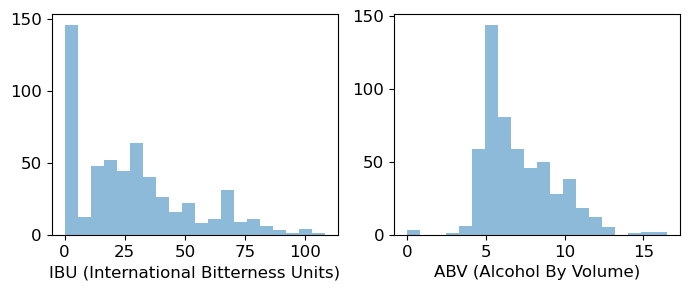

In [11]:
ibuList, abvList = list(), list()
for b in uniqueBeers:
    ibuList.append(b['beer']['beer_ibu'])
    abvList.append(b['beer']['beer_abv'])
    
print('Avg. IBU: {}'.format(np.mean(ibuList)))
print('Avg. ABV: {}'.format(np.mean(abvList)))

fig, axarr = plt.subplots(1, 2, figsize=(7,3))
axarr[0].hist(ibuList, bins=20, alpha=0.5, linewidth=0)
axarr[0].set_xlabel('IBU (International Bitterness Units)', fontsize=12)
axarr[0].tick_params(axis='both', which='major', labelsize=12)

axarr[1].hist(abvList, bins=20, alpha=0.5, linewidth=0)
axarr[1].set_xlabel('ABV (Alcohol By Volume)', fontsize=12)
axarr[1].tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()


(555, 2)


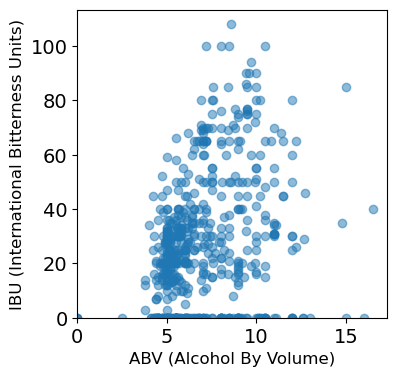

In [12]:
# Beer ABV vs IBU
beerMeasures = list()
for b in uniqueBeers:
    beerMeasures.append((b['beer']['beer_abv'],b['beer']['beer_ibu']))
beerMeasures = np.array(beerMeasures)
print(beerMeasures.shape)

fig = plt.figure(figsize=(4,4))
plt.scatter(beerMeasures[:,0], beerMeasures[:,1], alpha=0.5)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel('ABV (Alcohol By Volume)', fontsize=12)
plt.ylabel('IBU (International Bitterness Units)', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=14)

0.0 4.75


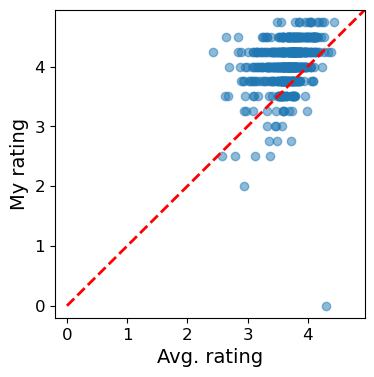

In [13]:
# Scatter plot of avg. ratings vs. my ratings
scatterData = list()
for b in uniqueBeers:
    if b['beer']['rating_score'] == 0:
        continue
    scatterData.append((b['beer']['rating_score'], b['rating_score']))
scatterData = np.array(scatterData)    

fig = plt.figure(figsize=(4,4))
plt.plot([0,5],[0,5],'r--', linewidth=2)
plt.scatter(scatterData[:,0], scatterData[:,1], alpha=0.5)

minV, maxV = np.min(scatterData), np.max(scatterData)
print(minV, maxV)
plt.xlim((minV-0.2, maxV+0.2))
plt.ylim((minV-0.2, maxV+0.2))
plt.xlabel('Avg. rating', fontsize=14)
plt.ylabel('My rating', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

1.9 4.85


/var/folders/98/0q2r8sh56f3_61nc699381w80000gn/T/ipykernel_55081/3059889202.py:34: UserWarning: The figure layout has changed to tight
  fig3.tight_layout()


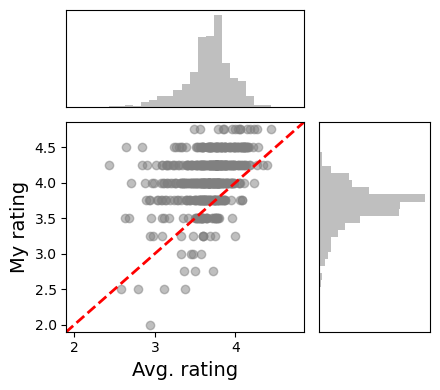

In [14]:
# Scatter plot of avg. ratings vs. my ratings
scatterData = list()
for b in uniqueBeers:
    if b['beer']['rating_score'] == 0 or b['rating_score'] == 0:
        continue
    scatterData.append((b['beer']['rating_score'], b['rating_score']))
scatterData = np.array(scatterData)    

fig3 = plt.figure(figsize=(4.5,4), constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :-1])
f3_ax2 = fig3.add_subplot(gs[1:, 0:-1])
f3_ax3 = fig3.add_subplot(gs[1:, -1])

minV, maxV = np.min(scatterData)-0.1, np.max(scatterData)+0.1
print(minV, maxV)
f3_ax1.set_xlim(minV, maxV)
f3_ax2.set_xlim(minV, maxV)
f3_ax2.set_ylim(minV, maxV)
f3_ax3.set_ylim(minV, maxV)
f3_ax1.set_xticks([])
f3_ax3.set_yticks([])
f3_ax1.set_yticks([])
f3_ax3.set_xticks([])

f3_ax1.hist(scatterData[:,0], bins=20, color='0.5', alpha=0.5)
f3_ax3.hist(scatterData[:,0], bins=20, color='0.5', alpha=0.5, orientation="horizontal")
f3_ax2.scatter(scatterData[:,0], scatterData[:,1], alpha=0.5, c='0.5')
f3_ax2.plot([0,5],[0,5],'r--', linewidth=2)

f3_ax2.set_xlabel('Avg. rating', fontsize=14)
f3_ax2.set_ylabel('My rating', fontsize=14)

fig3.tight_layout()

(550, 3)


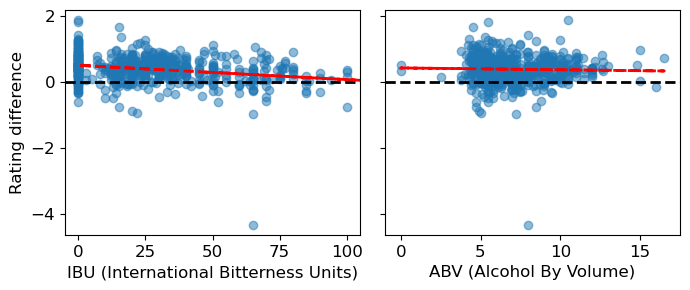

In [15]:
# What kind of beers I like more than avg. people
scatterData = list()
for b in uniqueBeers:
    if b['beer']['rating_score'] == 0:
        continue
    scatterData.append((b['rating_score'] - b['beer']['rating_score'], 
                        b['beer']['beer_abv'],
                        b['beer']['beer_ibu']))
scatterData = np.array(scatterData)    
print(scatterData.shape)

fig, axarr = plt.subplots(1, 2, figsize=(7,3), sharey=True)
axarr[0].scatter(scatterData[:,2], scatterData[:,0], alpha=0.5)
axarr[0].axhline(y=0, c='k', linewidth=2, linestyle='--')
fit = np.polyfit(scatterData[:,2], scatterData[:,0], 1)
fit_fn = np.poly1d(fit) 
axarr[0].plot(scatterData[:,2], fit_fn(scatterData[:,2]), 'r--', linewidth=2)
axarr[0].set_xlim(xmin=-5, xmax=105)
axarr[0].set_xlabel('IBU (International Bitterness Units)', fontsize=12)
axarr[0].set_ylabel('Rating difference', fontsize=12)
axarr[0].tick_params(axis='both', which='major', labelsize=12)

axarr[1].scatter(scatterData[:,1], scatterData[:,0], alpha=0.5)
axarr[1].axhline(y=0, c='k', linewidth=2, linestyle='--')
fit = np.polyfit(scatterData[:,1], scatterData[:,0], 1)
fit_fn = np.poly1d(fit) 
axarr[1].plot(scatterData[:,1], fit_fn(scatterData[:,1]), 'r--', linewidth=2)
axarr[1].set_xlim(xmin=-1, xmax=max(scatterData[:,1])+1)
axarr[1].set_xlabel('ABV (Alcohol By Volume)', fontsize=12)
axarr[1].tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()


In [16]:
# Cumulative beer discoveries
dTimes = list()
for b in uniqueBeers:
    dTimes.append(datetime.datetime.strptime(b['first_created_at'].split(' -')[0],
                                             '%a, %d %b %Y %H:%M:%S'))
dTimes.sort()
    
fig = plt.figure(figsize=(7,3))
plt.plot(dTimes, range(len(dTimes)), linewidth=2)
plt.ylabel('Unique beer count', fontsize=14)
plt.xticks(rotation=30)
plt.tick_params(axis='both', which='major', labelsize=12)

ValueError: unconverted data remains:  +0100